In [5]:
import pandas as pd
import networkx as nx

# Load CSV data
df = pd.read_csv('swat.csv')



In [6]:
mode = df["Normal/Attack"].mode()[0]
df["Normal/Attack"].fillna(mode, inplace=True)

In [7]:
df['Normal/Attack'] = df['Normal/Attack'].replace('A ttack', 'Attack')

In [8]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
label_encoder = LabelEncoder()

# fit and transform the categorical column 'Gender' into numerical labels
df['Normal/Attack'] = label_encoder.fit_transform(df['Normal/Attack'])


In [11]:
df.isna().sum()

 Timestamp       0
FIT101           0
LIT101           0
 MV101           0
P101             0
P102             0
 AIT201          0
AIT202           0
AIT203           0
FIT201           0
 MV201           0
 P201            0
 P202            0
P203             0
 P204            0
P205             0
P206             0
DPIT301          0
FIT301           0
LIT301           0
MV301            0
MV302            0
 MV303           0
MV304            0
P301             0
P302             0
AIT401           0
AIT402           0
FIT401           0
LIT401           0
P401             0
P402             0
P403             0
P404             0
UV401            0
AIT501           0
AIT502           0
AIT503           0
AIT504           0
FIT501           0
FIT502           0
FIT503           0
FIT504           0
P501             0
P502             0
PIT501           0
PIT502           0
PIT503           0
FIT601           0
P601             0
P602             0
P603             0
Normal/Attac

In [10]:
columns_with_null = df.columns[df.isnull().any()]

for column in columns_with_null:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [12]:
df[' Timestamp'] = pd.to_datetime(df[' Timestamp'])

In [13]:


# calculate the correlation matrix
corr_matrix = df.corr(method='pearson')

# display the correlation matrix
print(corr_matrix)


<ipython-input-13-19a32d6daa91>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


                 FIT101    LIT101     MV101      P101      P102    AIT201  \
FIT101         1.000000 -0.583078  0.966871  0.111263 -0.090734 -0.014695   
LIT101        -0.583078  1.000000 -0.585620 -0.597043 -0.009792  0.127681   
 MV101         0.966871 -0.585620  1.000000  0.126318 -0.088643 -0.018291   
P101           0.111263 -0.597043  0.126318  1.000000  0.040976 -0.030055   
P102          -0.090734 -0.009792 -0.088643  0.040976  1.000000  0.085603   
 AIT201       -0.014695  0.127681 -0.018291 -0.030055  0.085603  1.000000   
AIT202        -0.073108  0.211278 -0.076854 -0.283708 -0.003706 -0.120027   
AIT203        -0.027378 -0.499249 -0.008504  0.913870 -0.001377 -0.285367   
FIT201         0.115341 -0.606141  0.131152  0.990586  0.063754 -0.031187   
 MV201         0.111623 -0.587871  0.128127  0.988038  0.040485 -0.030537   
 P201               NaN       NaN       NaN       NaN       NaN       NaN   
 P202               NaN       NaN       NaN       NaN       NaN       NaN   

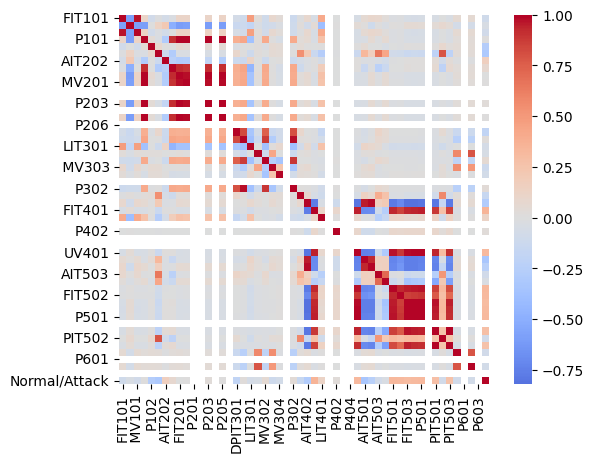

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True)

plt.show()

StopIteration: ignored

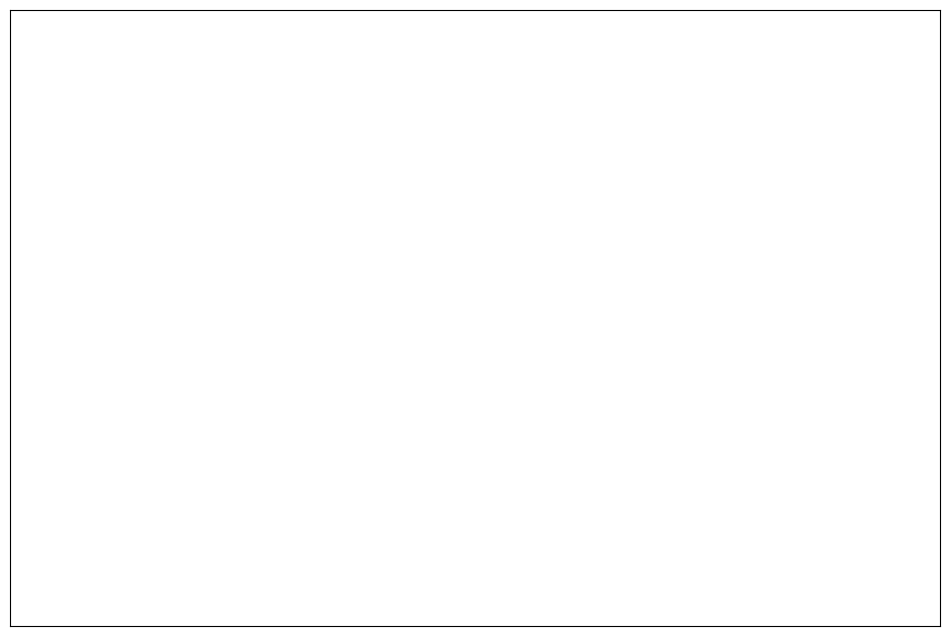

In [15]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            weight = corr_matrix.loc[col1, col2]
            G.add_edge(col1, col2, weight=weight)

# Set the edge colors based on the edge weights
edge_colors = [abs(G[u][v]["weight"]) for u, v in G.edges()]

# Draw the graph using spring layout and networkx labels
pos = nx.spring_layout(G, seed=42)
fig, ax = plt.subplots(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Reds, width=2, alpha=0.8, arrowsize=10)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="Arial")
ax.set_axis_off()
plt.show()

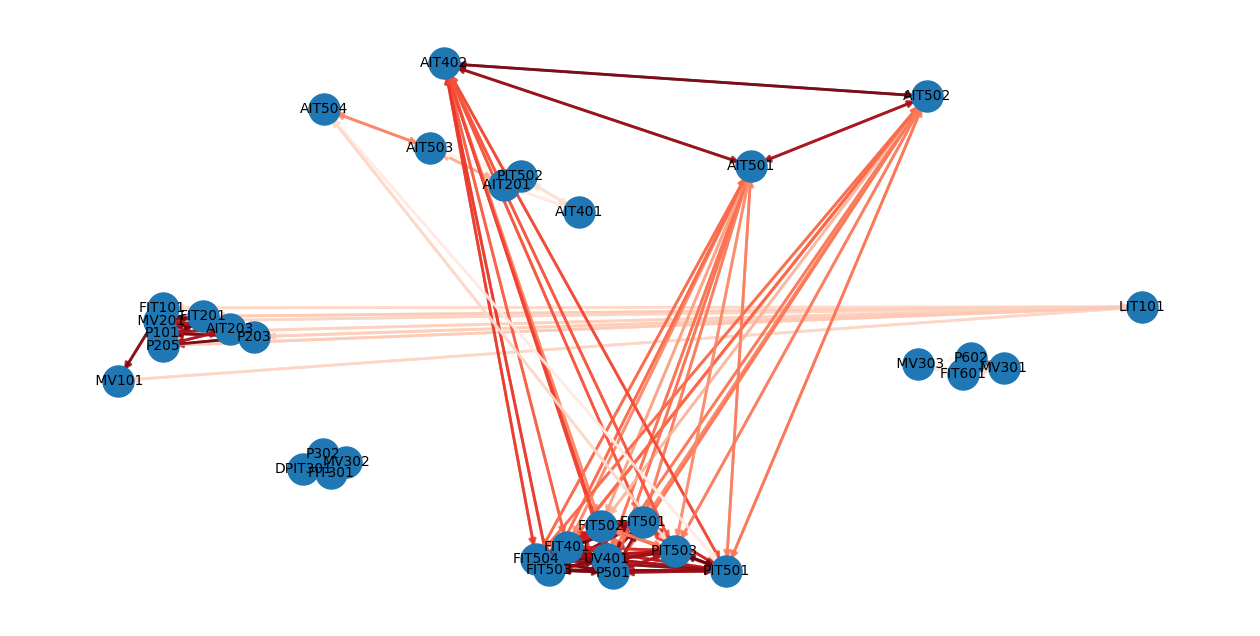

In [16]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()
threshold = 0.5
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            weight = corr_matrix.loc[col1, col2]
            if abs(weight) >= threshold:
                G.add_edge(col1, col2, weight=weight)

# Set the edge colors based on the edge weights
edge_colors = [abs(G[u][v]["weight"]) for u, v in G.edges()]

# Draw the graph using spring layout and networkx labels
pos = nx.spring_layout(G, seed=42)
fig, ax = plt.subplots(figsize=(16, 8))
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Reds, width=2, alpha=0.8, arrowsize=10)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="Arial")
ax.set_axis_off()
plt.show()


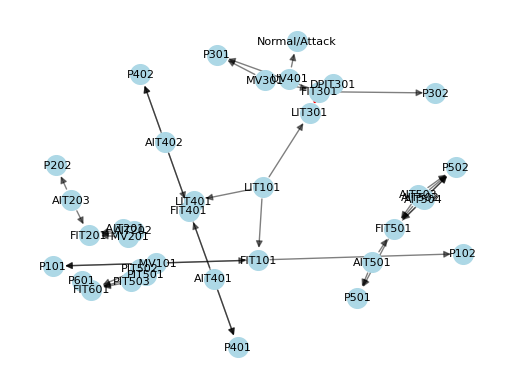

In [17]:
import networkx as nx
import statistics

# Load the graph

G = nx.DiGraph()

# Assuming you have a DataFrame named "df"
# Define a list of columns to display
nodes =  df[['FIT101', 'P101', 'P102', 'FIT201', 'FIT301', 'P301', 'P302', 'FIT401', 'P401', 'P402', 'FIT501', 'P501', 'P502', 'FIT601', 'P601', 'LIT101', 'LIT301', 'LIT401', ' MV101', ' MV201', 'MV301' , ' AIT201',  'AIT202',  'AIT203', 'AIT401', 'P401', 'AIT402', 'P402', 'AIT501', 'P501', 'AIT502', 'P502', 'AIT503', 'P502', 'AIT504', 'P502', 'DPIT301', 'UV401', 'PIT501', 'PIT502', 'PIT503','Normal/Attack']]
# Calculate the betweenness centrality for each edge
nodes=nodes.columns
G.add_nodes_from(nodes)
edges = [('FIT101', 'P101'),
    ('FIT101', 'P102'),
    ('FIT301', 'P301'),
    ('FIT301', 'P302'),
    ('FIT401', 'P401'),
    ('FIT401', 'P402'),
    ('FIT501', 'P501'),
    ('FIT501', 'P502'),
    ('FIT601', 'P601'),
    ('LIT101', 'FIT101'),
    ('LIT301', 'FIT301'),
    ('LIT401', 'FIT401'),
    (' MV101', 'FIT101'),
    (' MV101', 'P101'),
    (' MV201', 'FIT201'),
    ('MV301', 'FIT301'),
    ('MV301', 'P301'),
    (' AIT201', 'FIT201'),
    ('AIT202', 'FIT201'),
    ('AIT203', 'FIT201'),
    ('AIT203', ' P202'),
    ('AIT401', 'FIT401'),
    ('AIT401', 'P401'),
    ('AIT402', 'FIT401'),
    ('AIT402', 'P402'),
    ('AIT501', 'FIT501'),
    ('AIT501', 'P501'),
    ('AIT502', 'FIT501'),
    ('AIT502', 'P502'),
    ('AIT503', 'FIT501'),
    ('AIT503', 'P502'),
    ('AIT504', 'FIT501'),
    ('AIT504', 'P502'),
    ('DPIT301', 'FIT301'),
    ('UV401', 'Normal/Attack'),
    ('PIT501', 'FIT601'),
    ('PIT502', 'FIT601'),
    ('PIT503', 'FIT601'),
    ('LIT101', 'LIT301'),
    ('LIT101', 'LIT401')]
G.add_edges_from(edges)
edge_betweenness = nx.edge_betweenness_centrality(G)

# Calculate the average betweenness centrality of all edges
avg_betweenness = statistics.mean(edge_betweenness.values())

# Define a threshold for what is considered "significantly different"
std_devs = 2
threshold = avg_betweenness + std_devs * statistics.stdev(edge_betweenness.values())

# Identify edges with high betweenness centrality that are significantly different from other edges
anomalous_edges = [(u, v) for (u, v) in edge_betweenness if edge_betweenness[(u, v)] > threshold]

# Visualize the anomalous edges in the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=anomalous_edges, edge_color='r', width=2)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
plt.axis('off')
plt.show()


In [20]:
from sklearn.ensemble import IsolationForest
X = df.drop(['Normal/Attack', ' Timestamp'], axis=1)
y = df['Normal/Attack']

# Create an Isolation Forest model and fit it to the data
model = IsolationForest(contamination='auto', random_state=42)
model.fit(X)

# Predict outliers using the model
y_pred = model.predict(X)

# Print the number of outliers detected
print("Number of outliers:", len(y_pred[y_pred == -1]))

Number of outliers: 12432


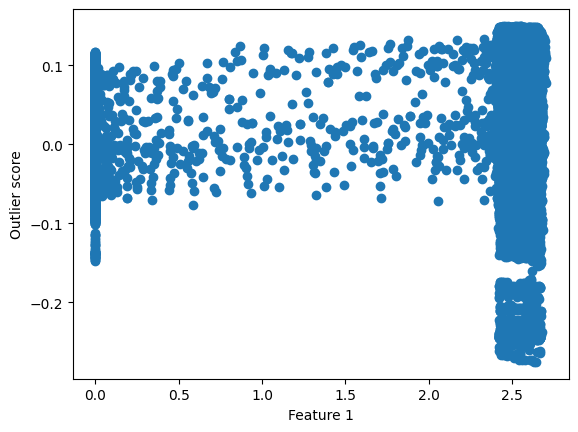

In [21]:
import matplotlib.pyplot as plt

# Get the outlier scores from the model
scores = model.decision_function(X)

# Plot the scores against the first feature
plt.scatter(X.iloc[:, 0], scores)
plt.xlabel('Feature 1')
plt.ylabel('Outlier score')
plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Preprocess the data
df_processed = df[['FIT101', 'P101', 'P102', 'FIT201', 'FIT301', 'P301', 'P302', 'FIT401', 'P401', 'P402', 'FIT501',
                   'P501', 'P502', 'FIT601', 'P601', 'LIT101', 'LIT301', 'LIT401', ' MV101', ' MV201', 'MV301',
                   ' AIT201', 'AIT202', 'AIT203', 'AIT401', 'P401', 'AIT402', 'P402', 'AIT501', 'P501', 'AIT502',
                   'P502', 'AIT503', 'P502', 'AIT504', 'P502', 'DPIT301', 'UV401', 'PIT501', 'PIT502', 'PIT503',
                   'Normal/Attack']].copy()

# Handle missing values if any
df_processed.fillna(df_processed.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
# df_processed["Normal/Attack"] = df_processed["Normal/Attack"].map({"Normal": 0, "Attack": 1})

df_processed = pd.DataFrame(scaler.fit_transform(df_processed), columns=df_processed.columns)

# Calculate the correlation matrix
correlation_matrix = df_processed.corr().abs()

# Convert correlation matrix to adjacency matrix
threshold = 0.6  # Adjust this threshold based on your requirements
adjacency_matrix = (correlation_matrix >= threshold).astype(int).values


In [23]:
def pagerank(graph, damping_factor=0.85, max_iterations=100, epsilon=1e-8):
    num_nodes = graph.shape[0]
    transition_matrix = normalize_graph(graph)
    ranks = np.ones(num_nodes) / num_nodes  # Initialize all ranks to equal values

    for i in range(max_iterations):
        prev_ranks = ranks.copy()
        ranks = (1 - damping_factor) / num_nodes + damping_factor * np.dot(transition_matrix, ranks)

        # Check convergence
        if np.linalg.norm(ranks - prev_ranks) < epsilon:
            break

    return ranks

def normalize_graph(graph):
    # Normalize the graph by row (outgoing links)
    row_sums = graph.sum(axis=1)
    row_sums[row_sums == 0] = 1  # Avoid division by zero
    return graph / row_sums[:, np.newaxis]

# Apply PageRank algorithm
ranks = pagerank(adjacency_matrix)


In [24]:
threshold = 0.1  # Adjust this threshold based on your requirements

anomalies = df_processed.columns[ranks < threshold].tolist()
print("Anomalies:", anomalies)


Anomalies: ['FIT101', 'P101', 'P102', 'FIT201', 'FIT301', 'P301', 'P302', 'FIT401', 'P401', 'P402', 'FIT501', 'P501', 'P502', 'FIT601', 'P601', 'LIT101', 'LIT301', 'LIT401', ' MV101', ' MV201', 'MV301', ' AIT201', 'AIT202', 'AIT203', 'AIT401', 'P401', 'AIT402', 'P402', 'AIT501', 'P501', 'AIT502', 'P502', 'AIT503', 'P502', 'AIT504', 'P502', 'DPIT301', 'UV401', 'PIT501', 'PIT502', 'PIT503', 'Normal/Attack']


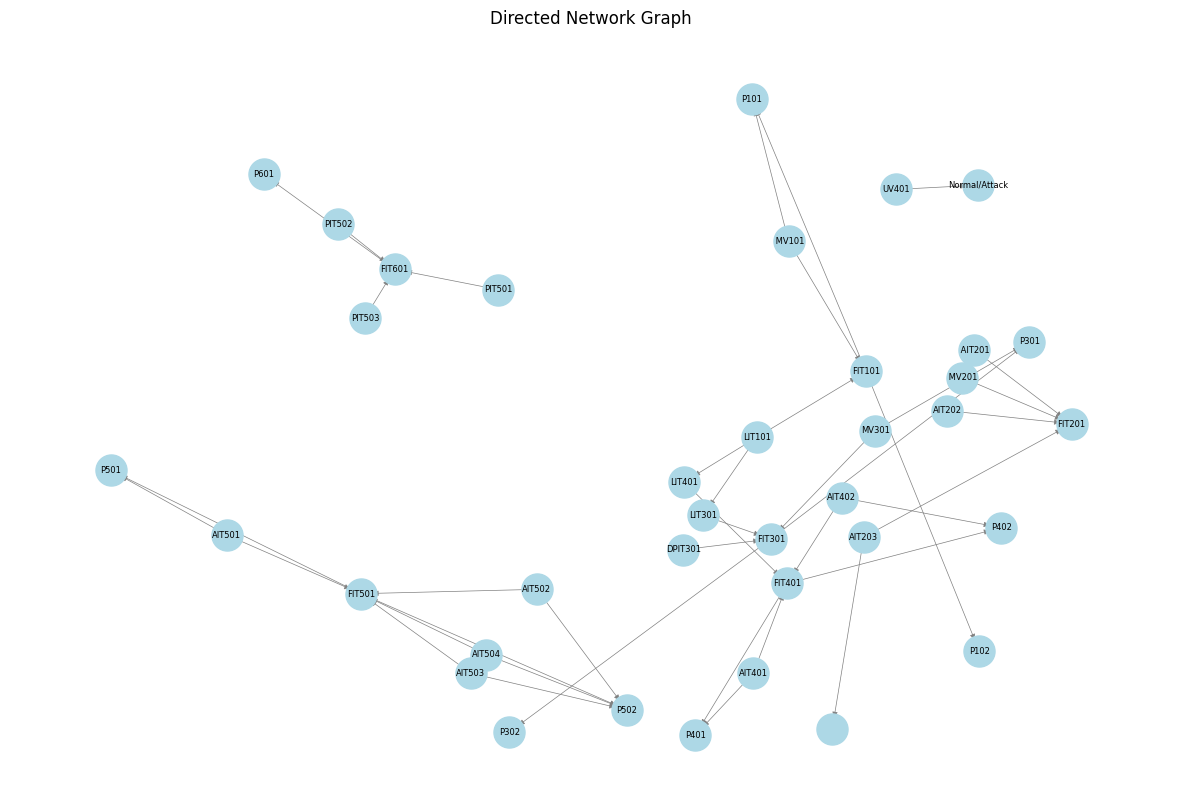

In [ ]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G, k=0.3)

# Draw the graph
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=8, width=0.5)
nx.draw_networkx_labels(G, pos, labels={node: node for node in nodes}, font_size=6, font_color='black')
plt.title("Directed Network Graph")
plt.axis('off')
plt.show()